### Contrôle Continu - LU2PY222 : Modélisation Numérique en Physique
#### 5 mars 2025, 10h45 - 12h45

Vous rendrez sur Moodle un **compte-rendu** sous la forme d'un calepin **Jupyter** comprenant :
- vos codes python (bien commentés)
- vos graphiques (axes nommés et courbes légendées lorsque c'est nécessaire)
- les commentaires des résultats sous format Markdown lorsque c'est demandé

Vous avez le droit d'accéder à tous les calepins jupyter présents sur votre Hub, ainsi qu'à vos notes (manuscrites ou numériques) prises pendant les séances de travail de cette UE. L'accès à internet est limité aux sites de documentation **python**, **numpy** et **matplotlib**, et à Moodle. Vos documents numériques doivent être présents dans vos fichiers personnels Moodle. Les clés USB, smartphones et tablettes ne sont pas acceptées.

# Particule dans un cyclotron

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![](Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

On importe les modules <code>matplotlib</code> et <code>numpy</code> au préalable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Partie I

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 

On crée un tableau contenant les valeurs de $n$ entre 0 et 50 inclus puis on utilise une boucle itérative pour calculer $t_n$ et ajouter chaque valeur au tableau, avec $\tau = 0.5$.

In [9]:
tab_n = np.arange(0,51)
t_n = []
tau = 0.5
for n in tab_n :
    t_n.append(n + tau * np.sqrt(n))

2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.

On va vérifier que les avaleurs de notre tableau $t$ sont bonnes en utilisant l'opérateur booléen <code>==</code> qui renvoie <code>True</code> ou <code>False</code> en fonction de si les valeurs à gaucxhe et à droite de l'égalité sont égales ou non. Si on reçoit un <code>False</code>, cela signifiera que nos calculs contiennent une erreur.

In [10]:
print(t_n[1] == 1.5)
print(t_n[4] == 5)
print(t_n[9] == 10.5)
print(t_n[16] == 18)
print(t_n[25] == 27.5)

True
True
True
True
True


Il ne semble y avoir aucune erreur dans les calculs de la question 1).

3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 

On est ici dans le cas où $t$ varie de $t_{n+1}-1$ à $t_{n+1}$, et $n+1 = 2$, c’est-à-dire $n = 1$ :
$$v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)$$
où $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

On crée un nouveau tableau, comme demandé dans la question, qu'on appellera $t_{bis}$, contenant 100 valeurs de $t$ régulièrement espacées entre $t_{2}-1$ à $t_{2}$. Cela permettra de bien voir l'évolution de la vitesse une fois qu'elle sera calculée.
On crée aussi la variable $n_{1}$ qui est ici égale à 1.

In [11]:
n1 = 1
tbis = np.linspace(t_n[n1+1]-1, t_n[n1+1], 100)
vx1 = []
vy1 = []
for t in tbis :
    vx1.append((-1)**(n1) * np.sqrt(n1+1) * np.sin(np.pi*(t - tbis[n1 + 1])))
    vy1.append(-(-1)**(n1) * np.sqrt(n1+1) * np.cos(np.pi*(t - tbis[n1 + 1])))

On répète pour $n+1=4$, donc $n=3$.

In [18]:
n2 = 3
tter = np.linspace(t_n[n2+1]-1, t_n[n2+1], 100)
vx2 = []
vy2 = []
for t in tter :
    vx2.append((-1)**(n2) * np.sqrt(n2+1) * np.sin(np.pi*(t - tter[n2 + 1])))
    vy2.append(-(-1)**(n2) * np.sqrt(n2+1) * np.cos(np.pi*(t - tter[n2 + 1])))

4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.

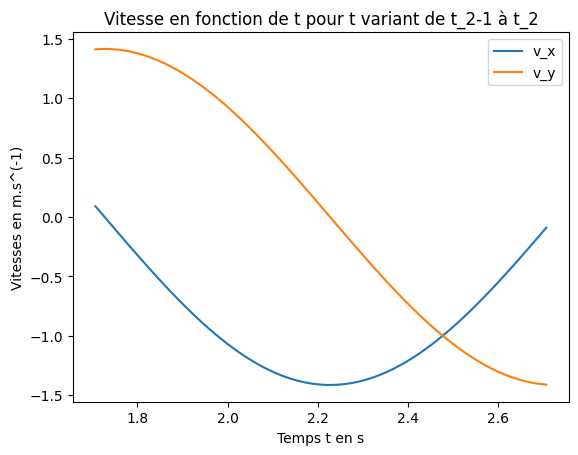

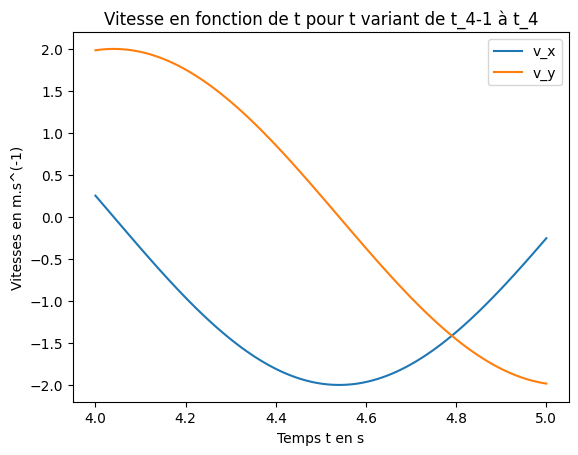

In [19]:
# Vitesse en fonction de t pour t variant de t_2-1 à t_2
plt.plot(tbis, vx1, label = "v_x")
plt.plot(tbis, vy1, label = "v_y")
plt.title("Vitesse en fonction de t pour t variant de t_2-1 à t_2")
plt.xlabel("Temps t en s")
plt.ylabel("Vitesses en m.s^(-1)")
plt.legend()
plt.show()

# Vitesse en fonction de t pour t variant de t_4-1 à t_4
plt.plot(tter, vx2, label = "v_x")
plt.plot(tter, vy2, label = "v_y")
plt.title("Vitesse en fonction de t pour t variant de t_4-1 à t_4")
plt.xlabel("Temps t en s")
plt.ylabel("Vitesses en m.s^(-1)")
plt.legend()
plt.show()

5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

In [20]:
max_vx1 = 0
indice_vx1 = 0
for i in range(len(vx1)):
    if vx1[i] > max_vx1:
        max_vx1 = vx1[i]
        indice_vx1 = i
print(f"Le maximum dans le tableau vx1 est {max_vx1} et il correspond à la valeur {tbis[indice_vx1]}.")

max_vy1 = 0
indice_vy1 = 0
for i in range(len(vy1)):
    if vy1[i] > max_vy1:
        max_vy1 = vy1[i]
        indice_vy1 = i
print(f"Le maximum dans le tableau vy1 est {max_vy1} et il correspond à la valeur {tbis[indice_vy1]}.")

max_vx2 = 0
indice_vx2 = 0
for i in range(len(vx2)):
    if vx2[i] > max_vx2:
        max_vx2 = vx2[i]
        indice_vx2 = i
print(f"Le maximum dans le tableau vx2 est {max_vx2} et il correspond à la valeur {tter[indice_vx1]}.")

max_vy2 = 0
indice_vy2 = 0
for i in range(len(vy2)):
    if vy2[i] > max_vy2:
        max_vy2 = vy2[i]
        indice_vy2 = i
print(f"Le maximum dans le tableau vy2 est {max_vy2} et il correspond à la valeur {tter[indice_vy2]}.")

Le maximum dans le tableau vx1 est 0.08969496735717465 et il correspond à la valeur 1.7071067811865475.
Le maximum dans le tableau vy1 est 1.4142135623730951 et il correspond à la valeur 1.7273088013885676.
Le maximum dans le tableau vx2 est 0.25318490714750014 et il correspond à la valeur 4.0.
Le maximum dans le tableau vy2 est 2.0 et il correspond à la valeur 4.040404040404041.


## Partie II
6. Représenter $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. On remarque que $v_x$ et $v_y$ sont des fonctions continues du temps $t$. Commenter.

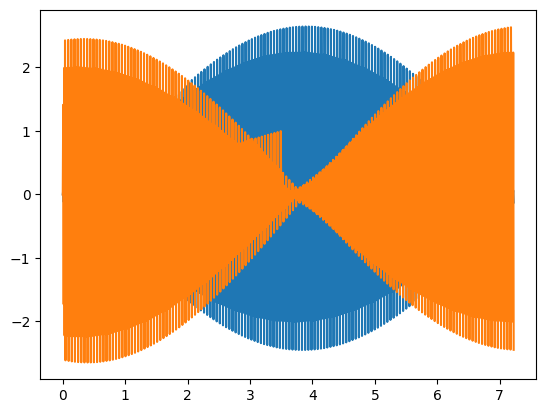

In [33]:
# On crée le tableau des t qui va de t0 à t6
tab_t = np.linspace(0, t_n[6], 1000)

# On crée le tableau des vitesses
tab_vx = []
tab_vy = []


for i in tab_t :
    for n in range (0,7) :
        if i >= t_n[n] and i <= (t_n[n+1]-1) :
            tab_vx.append(0)
            tab_vy.append((-1)**(n) * (np.sqrt(n) + (i - tab_t[n])/tau))
        else:
            tab_vx.append((-1)**(n) * np.sqrt(n+1) * np.sin(np.pi*(i - tab_t[n + 1])))
            tab_vy.append(-(-1)**(n) * np.sqrt(n+1) * np.cos(np.pi*(i - tab_t[n + 1])))
            
plt.plot(tab_t,tab_vx[:1000])
plt.plot(tab_t,tab_vy[:1000])

Les graphes obtenus ne semblent pas corrects.

7. Représenter le module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. Commenter. A quoi sert un cyclotron ?

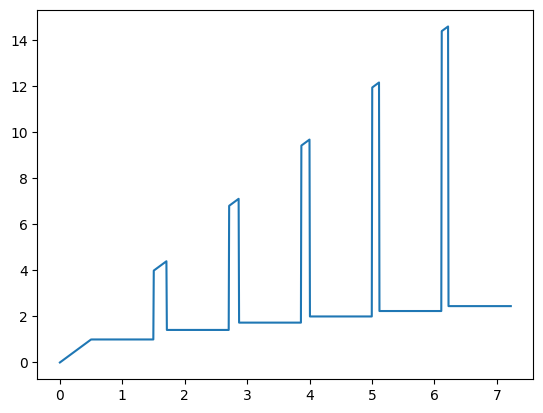

In [28]:
module = []
for i in range(len(tab_t)):
    module.append(np.sqrt((tab_vx[i])**2 + (tab_vy[i])**2))
plt.plot(tab_t, module)

8. Pour $n$ variant de $0$ à $50$, représenter le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$, qui est le temps total passé par le proton entre les D à l'instant $t_n$. Commenter.

In [ ]:
for n in tab_n:
    for i in t_n :
        if i >= t_n[n] and i <= (t_n[n+1]-1) :
            tab_vx[n].append(0)
            tab_vy[n].append((-1)**(n) * (np.sqrt(n) + (i - tab_t[n])/tau))
        elif i >= (t_n[n+1]-1) and i <= t_n[n+1] :
            tab_vx[n].append((-1)**(n) * np.sqrt(n+1) * np.sin(np.pi*(i - tab_t[n + 1])))
            tab_vy[n].append(-(-1)**(n) * np.sqrt(n+1) * np.cos(np.pi*(i - tab_t[n + 1])))
            
print(t_n-n, 